In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import glob
import seaborn as sns

In [78]:
df = pd.read_html('Research_Management_System_Scheme.html')[0]
df.rename(columns={0:'Project ID',
                   1:'Investigator(s)',
                   2:'Summary',
                   3:'Announced',
                   4:'Administering Organisation',
                   5:'Primary FOR',
                   6:'Funding Awarded'
                  }, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [79]:
df.dtypes

Project ID                     object
Investigator(s)                object
Summary                        object
Announced                      object
Administering Organisation     object
Primary FOR                   float64
Funding Awarded                object
dtype: object

In [80]:
df['Primary FOR'] = df['Primary FOR'].astype(int)
df['Funding Awarded'] = [float(s.replace('$','').replace(',','')) for s in df['Funding Awarded']]


In [81]:
df

,Project ID,Investigator(s),Summary,Announced,Administering Organisation,Primary FOR,Funding Awarded
0,DP200100223,Professor Sharon Robinson; Associate Professor...,High resolution health assessment of Antarcti...,04/12/2019,University of Wollongong,501,505000.0
1,DP200100210,Professor Nalini Joshi; Dr Milena Radnovic,Geometric analysis of nonlinear systems. Mode...,04/12/2019,The University of Sydney,105,426000.0
2,DP200100204,Professor Adam Lee; Dr Hamid Arandiyan; Dr Car...,Spatially orthogonal multifunctional material...,04/12/2019,RMIT University,306,467500.0
3,DP200100190,Dr Antony Eagle; Professor Cody Gilmore; Assoc...,"Everything in its Place: Location, Persistenc...",04/12/2019,The University of Adelaide,2203,224672.0
4,DP200100129,Professor Marc Wilkins,The Regulatory Network of Histone Methylating...,04/12/2019,The University of New South Wales,601,471171.0
...,...,...,...,...,...,...,...
655,DP200102377,Associate Professor Irina Vetter; Dr Thomas Durek,Toxins from Down Under: Novel tools to unders...,04/12/2019,The University of Queensland,304,390000.0
656,DP200101830,Associate Professor Nir Eynon; Dr Sarah Voisin...,Can exercise slow down the epigenetic ageing ...,04/12/2019,Victoria University,604,444000.0
657,DP200101777,Professor Joy Damousi; Professor Philip Dwyer...,"Aftermaths of War: Violence, Trauma, Displace...",04/12/2019,The University of Melbourne,2103,448000.0
658,DP200100310,Professor Martin Kennedy; Professor Simon Poul...,High resolution warm ocean records from lamin...,04/12/2019,Macquarie University,403,280000.0


# Total money awarded per uni

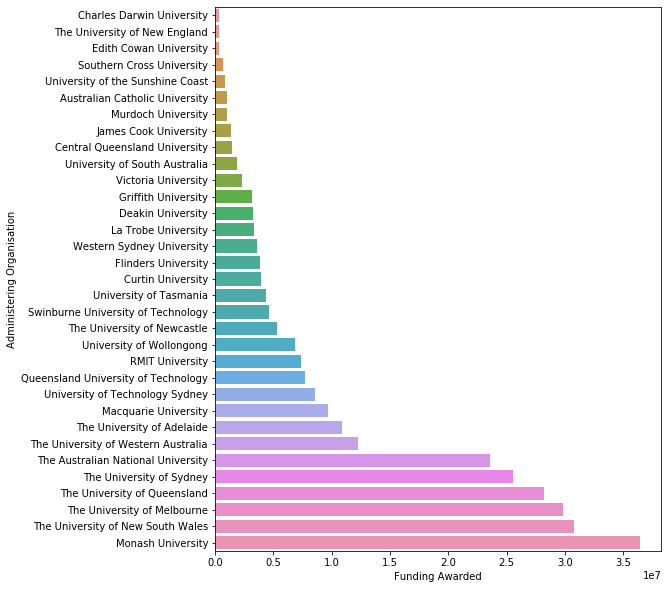

In [41]:
result = df.groupby(["Administering Organisation"])['Funding Awarded'].aggregate(np.sum).reset_index().sort_values('Funding Awarded')
plt.figure(figsize=(8, 10))
sns.barplot(y='Administering Organisation',x='Funding Awarded', data=df, estimator=sum, 
            order=result["Administering Organisation"], ci=None)

# Average money awarded per uni

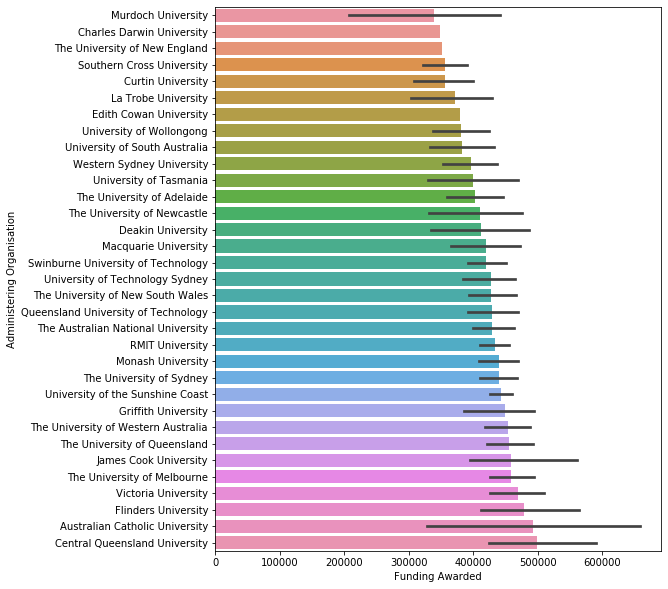

In [49]:
result = df.groupby(["Administering Organisation"])['Funding Awarded'].aggregate(np.mean).reset_index().sort_values('Funding Awarded')
plt.figure(figsize=(8, 10))
sns.barplot(y='Administering Organisation',x='Funding Awarded', data=df, 
            order=result["Administering Organisation"])
sns.title = 'Average Project Budget per Uni'

# Nb Projects awarded per uni

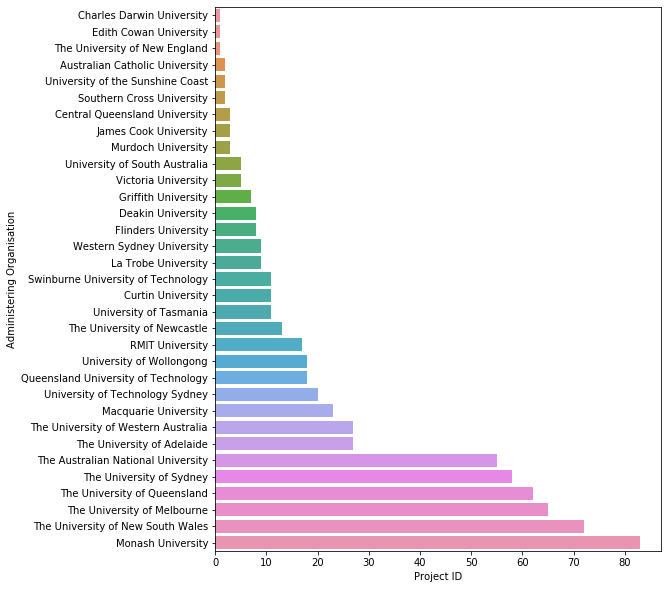

In [60]:
result = df.groupby(["Administering Organisation"])['Project ID'].aggregate(np.count_nonzero).reset_index().sort_values('Project ID')
result.head()
plt.figure(figsize=(8, 10))
sns.barplot(y='Administering Organisation', x= 'Project ID', data=result, estimator=sum, 
            order=result["Administering Organisation"])

 # PI citations and index x funding

In [62]:
import scholarly

In [85]:
def getPI(df):
    res =[]
    for i in range(len(df)):
        inv =  df.at[i,'Investigator(s)']
        inv =  inv.replace('Associate Professor ','')
        inv =  inv.replace('Professor ','')
        inv =  inv.replace('Associate ','')
        inv =  inv.replace('Dr ','')
        inv = inv.split(';')
        res.append(inv)
    return res

PI_List  = getPI(df)
df['PI_List'] = PI_List 
df['PI1'] = [pi[0] for pi in PI_List]

df.head()
        
    

,Project ID,Investigator(s),Summary,Announced,Administering Organisation,Primary FOR,Funding Awarded,PI_List,PI1
0,DP200100223,Professor Sharon Robinson; Associate Professor...,High resolution health assessment of Antarcti...,04/12/2019,University of Wollongong,501,505000.0,"[Sharon Robinson, Arko Lucieer, Margaret Bar...",Sharon Robinson
1,DP200100210,Professor Nalini Joshi; Dr Milena Radnovic,Geometric analysis of nonlinear systems. Mode...,04/12/2019,The University of Sydney,105,426000.0,"[Nalini Joshi, Milena Radnovic]",Nalini Joshi
2,DP200100204,Professor Adam Lee; Dr Hamid Arandiyan; Dr Car...,Spatially orthogonal multifunctional material...,04/12/2019,RMIT University,306,467500.0,"[Adam Lee, Hamid Arandiyan, Carmine D'Agosti...",Adam Lee
3,DP200100190,Dr Antony Eagle; Professor Cody Gilmore; Assoc...,"Everything in its Place: Location, Persistenc...",04/12/2019,The University of Adelaide,2203,224672.0,"[Antony Eagle, Cody Gilmore, Shieva Kleinsch...",Antony Eagle
4,DP200100129,Professor Marc Wilkins,The Regulatory Network of Histone Methylating...,04/12/2019,The University of New South Wales,601,471171.0,[Marc Wilkins],Marc Wilkins


In [138]:
## Analyse CS only 
df['Primary FOR'] = df['Primary FOR'].astype(str)
print(df.dtypes)
dfcs = df[df['Primary FOR'] '8']
len(dfcs)

Project ID                     object
Investigator(s)                object
Summary                        object
Announced                      object
Administering Organisation     object
Primary FOR                    object
Funding Awarded               float64
PI_List                        object
PI1                            object
hindex                         object
citations                      object
dtype: object


KeyError: False

In [126]:
import urllib.request
def gethindex(search_address):
    with urllib.request.urlopen(search_address) as response:
        html = str(response.read())
        if html.find("h-index</a></td><td class") == -1:
            pass #print "This site has not h-index
        else: # site is a valid patent site, after text searching and cleaning, attache title, abstract and claims to doclist
            #finds title text between the characters FONT size... and FONT
            hindex = html.split('h-index</a></td><td class="gsc_rsb_std">')[-1].split('</td><td class="gsc_rsb_std">')[0]
            return hindex

In [136]:
df['hindex'] = 'Nan'
df['citations'] = 'Nan'


hindexlist = [[],[],[]]
for i in range(len(df.PI1)):
    if(df.at[i,'hindex'] == 'Nan') and (df.at[i,'citations'] == 'Nan'):
        print(df.PI1[i], scholarly.search_author(df.PI1[i]))
        a = next(scholarly.search_author(df.PI1[i]),None)
        if a == None:
            df.at[i,'hindex'] = np.nan
            df.at[i,'citations'] = np.nan
            pass
        else:
            search_query = next(scholarly.search_author(df.PI1[i]))
            author = search_query.fill()
            link= str('https://scholar.google.com/citations?user='+ a.id)
            hindex = gethindex(link)
            print(link, hindex, a.citedby)
            df.at[i,'hindex'] = hindex
            df.at[i,'citations'] = a.citedby



Sharon Robinson <generator object _search_citation_soup at 0x7f3764873b50>
https://scholar.google.com/citations?user=crva6J0AAAAJ 44 7211
Nalini Joshi <generator object _search_citation_soup at 0x7f37656f4ed0>
Adam Lee <generator object _search_citation_soup at 0x7f3764873b50>
https://scholar.google.com/citations?user=pBb87nEAAAAJ 61 12932
Antony Eagle <generator object _search_citation_soup at 0x7f3763adaf50>
https://scholar.google.com/citations?user=FSz2CpAAAAAJ 10 431
Marc Wilkins <generator object _search_citation_soup at 0x7f37649a5ed0>
https://scholar.google.com/citations?user=K-lozBIAAAAJ 51 23063
Sharath Sriram <generator object _search_citation_soup at 0x7f3765391f50>
https://scholar.google.com/citations?user=1MwZCG8AAAAJ 38 5437
 David Suggett <generator object _search_citation_soup at 0x7f3763f51d50>
https://scholar.google.com/citations?user=rlqZpcQAAAAJ 38 4963
Suzanne Fraser <generator object _search_citation_soup at 0x7f3764a6c3d0>
https://scholar.google.com/citations?use

KeyboardInterrupt: 

In [131]:
len(hindexlist[0])

53

In [130]:
len(df)

660

In [ ]:
y= a[1]
y = map(int, y)
x= a[2]

fig, ax = plt.subplots(figsize=(8, 5))
ax.set(xscale="log", yscale="log")
ax.scatter(x,y)
ax.set_xlabel("Number of citations", fontsize=12)
ax.set_ylabel("H-Index", fontsize=12)
#plt.xlim(xmax=3)
plt.ylim(ymin=3)
for i, txt in enumerate(a[0]):
    ax.annotate( txt, ( x[i] , y[i]  ) )
    #print txt, i

#plt.grid()
#plt.show()